In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from math import sqrt

transformar_features = True
data = pd.read_csv('./df_input.csv', sep=';', delimiter=';')
one_hot_encoder = OneHotEncoder(sparse=False)

In [2]:
print('Quantidade de Linhas de Onibus', len(data.linha.unique()))

busline_filter = 41
df_dados = data.loc[data['linha'] == busline_filter]
encoded_model_data = df_dados.copy()
encoded_model_data[['domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']] = one_hot_encoder.fit_transform(df_dados['d_semana'].values.reshape(-1,1))
df_dados = encoded_model_data.copy()
display(df_dados)

Quantidade de Linhas de Onibus 404


,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,41,2020-03-01 04:00:00,25,6,8.878852e-01,0.460065,4,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,41,2020-03-01 05:00:00,168,6,9.790841e-01,0.203456,5,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,41,2020-03-01 06:00:00,310,6,9.976688e-01,-0.068242,6,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,41,2020-03-01 07:00:00,339,6,9.422609e-01,-0.334880,7,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,41,2020-03-01 08:00:00,286,6,8.169699e-01,-0.576680,8,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,41,2020-12-31 20:00:00,138,3,-7.308360e-01,0.682553,20,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,41,2020-12-31 21:00:00,83,3,-5.195840e-01,0.854419,21,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,41,2020-12-31 22:00:00,54,3,-2.697968e-01,0.962917,22,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,41,2020-12-31 23:00:00,30,3,-2.449294e-16,1.000000,23,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
feature_names = ['validations_per_hour','d_semana','hour_sin','hour_cos','hora','d_mes','d_ano','mes','semana_do_mes','domingo','segunda','terca','quarta','quinta','sexta','sabado']
df_dados_model = df_dados.filter(feature_names)

display(df_dados_model)

,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,25,6,8.878852e-01,0.460065,4,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,168,6,9.790841e-01,0.203456,5,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,310,6,9.976688e-01,-0.068242,6,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,339,6,9.422609e-01,-0.334880,7,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,286,6,8.169699e-01,-0.576680,8,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,138,3,-7.308360e-01,0.682553,20,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,83,3,-5.195840e-01,0.854419,21,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,54,3,-2.697968e-01,0.962917,22,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,30,3,-2.449294e-16,1.000000,23,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
if(transformar_features): 
    scaler = MinMaxScaler(feature_range=(0, 1))

    df_dados_model[feature_names] = scaler.fit_transform(df_dados_model[feature_names])

    df_dados_model
df_dados_model

,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,0.016973,1.000000,0.944980,0.728769,0.173913,0.0,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,0.118105,1.000000,0.990686,0.599865,0.217391,0.0,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,0.218529,1.000000,1.000000,0.463380,0.260870,0.0,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,0.239038,1.000000,0.972231,0.329437,0.304348,0.0,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,0.201556,1.000000,0.909439,0.207971,0.347826,0.0,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,0.096888,0.500000,0.133728,0.840534,0.869565,1.0,1.000000,1.000000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,0.057992,0.500000,0.239601,0.926869,0.913043,1.0,1.000000,1.000000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,0.037482,0.500000,0.364786,0.981372,0.956522,1.0,1.000000,1.000000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,0.020509,0.500000,0.500000,1.000000,1.000000,1.0,1.000000,1.000000,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0


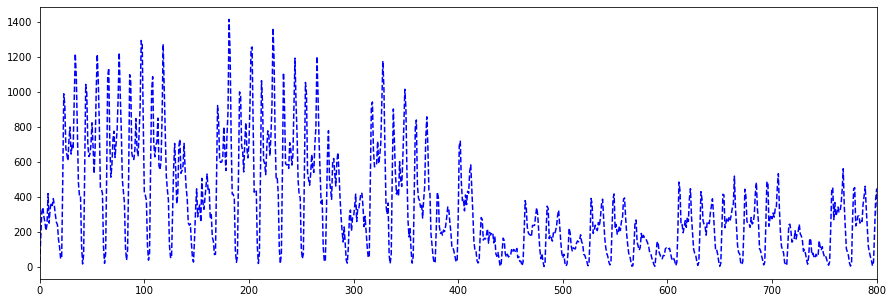

In [5]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_dados)),df_dados['validations_per_hour'], 'b--')
plt.xlim(0,800)
plt.show()

In [6]:
time_steps = 168
test_size = 168

train_size = int(len(df_dados_model)-(test_size))
train, test = df_dados_model.iloc[0:train_size], df_dados_model.iloc[(train_size-time_steps):len(df_dados_model)]

print(len(train), len(test))
display(train)
display(test)

6004 336


,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,0.016973,1.000000,0.944980,0.728769,0.173913,0.000000,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,0.118105,1.000000,0.990686,0.599865,0.217391,0.000000,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,0.218529,1.000000,1.000000,0.463380,0.260870,0.000000,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,0.239038,1.000000,0.972231,0.329437,0.304348,0.000000,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,0.201556,1.000000,0.909439,0.207971,0.347826,0.000000,0.164384,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378702,0.167610,0.333333,0.133728,0.840534,0.869565,0.733333,0.978082,1.000000,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1378703,0.139321,0.333333,0.239601,0.926869,0.913043,0.733333,0.978082,1.000000,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1378704,0.156294,0.333333,0.364786,0.981372,0.956522,0.733333,0.978082,1.000000,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1378705,0.111033,0.333333,0.500000,1.000000,1.000000,0.733333,0.978082,1.000000,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
1342714,0.044554,0.333333,0.944980,0.728769,0.173913,0.5,0.958904,1.0,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1342715,0.300566,0.333333,0.990686,0.599865,0.217391,0.5,0.958904,1.0,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1342716,0.745403,0.333333,1.000000,0.463380,0.260870,0.5,0.958904,1.0,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1342717,0.662659,0.333333,0.972231,0.329437,0.304348,0.5,0.958904,1.0,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1342718,0.397454,0.333333,0.909439,0.207971,0.347826,0.5,0.958904,1.0,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,0.096888,0.500000,0.133728,0.840534,0.869565,1.0,1.000000,1.0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,0.057992,0.500000,0.239601,0.926869,0.913043,1.0,1.000000,1.0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,0.037482,0.500000,0.364786,0.981372,0.956522,1.0,1.000000,1.0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,0.020509,0.500000,0.500000,1.000000,1.000000,1.0,1.000000,1.0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
len(train.columns)

16

In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps), 0].to_numpy()
        v = np.append(v,X.iloc[i + time_steps,1])#d_semana
        v = np.append(v,X.iloc[i + time_steps,2])#hr_cos
        v = np.append(v,X.iloc[i + time_steps,3])#hr_cos
        #v = np.append(v,X.iloc[i + time_steps,4])#d_mes
        v = np.append(v,X.iloc[i + time_steps,5])#d_ano
        v = np.append(v,X.iloc[i + time_steps,6])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,7])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,8])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,9])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,10])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,11])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,12])#d_semanaonehotencoded 
        v = np.append(v,X.iloc[i + time_steps,13])#semana_do_mes
        v = np.append(v,X.iloc[i + time_steps,14])#semana_do_mes
        v = np.append(v,X.iloc[i + time_steps,15])#semana_do_mes
        Xs.append([v])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train, train['validations_per_hour'], time_steps)
X_test, y_test = create_dataset(test, test['validations_per_hour'], time_steps)

In [9]:
display(X_train[1])

array([[0.11810467, 0.218529  , 0.23903819, 0.20155587, 0.17892504,
        0.14497878, 0.17043847, 0.29490806, 0.17538897, 0.23338048,
        0.25813296, 0.24681754, 0.27439887, 0.24611033, 0.20792079,
        0.17821782, 0.16831683, 0.10820368, 0.07850071, 0.0311174 ,
        0.03677511, 0.33734088, 0.69872702, 0.65417256, 0.47807638,
        0.45190948, 0.42857143, 0.5155587 , 0.56435644, 0.45473833,
        0.49009901, 0.48090523, 0.66195191, 0.86138614, 0.76449788,
        0.54879774, 0.33946252, 0.2864215 , 0.28783593, 0.08769448,
        0.00990099, 0.04809052, 0.37906648, 0.73691655, 0.70155587,
        0.49292786, 0.44483734, 0.45403112, 0.49292786, 0.58132956,
        0.48656294, 0.37553041, 0.48373409, 0.70792079, 0.85855728,
        0.74681754, 0.572843  , 0.31966054, 0.3125884 , 0.29490806,
        0.07708628, 0.01272984, 0.0523338 , 0.36562942, 0.76944837,
        0.80268741, 0.50070721, 0.36138614, 0.40876945, 0.51272984,
        0.54738331, 0.44130127, 0.4950495 , 0.55

In [10]:
def getModel():
    model = tf.keras.Sequential()
    
    # MLP    
#     model.add(tf.keras.layers.Dense(300, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(tf.keras.layers.Dense(100, activation="relu"))
#     model.add(tf.keras.layers.Dense(30, activation="relu"))
#     model.add(tf.keras.layers.Dense(10, activation="relu"))
    
    # Vanilla LSTM
#     model.add(tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        
#     # Stacked LSTM
    model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]) ))
#     model.add(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(30, activation='relu', return_sequences=True))
    model.add(tf.keras.layers.LSTM(25, activation='relu'))
    
    # Bidirectional LSTM
#   model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(tf.keras.layers.Dense(units=1, activation='softplus'))
    # model.add(tf.keras.layers.Dense(units=1))

    return model

In [11]:
model = getModel()

optimizer = tf.keras.optimizers.Adam(0.002)
#optimizer = tf.keras.optimizers.SGD(0.05)

model.compile(
  loss='mse',
  optimizer=optimizer
)

# model.compile(
#   loss='mean_squared_error',
#   optimizer=tf.keras.optimizers.SGD(0.05)
# )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             46600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 54,226
Trainable params: 54,226
Non-trainable params: 0
_________________________________________________________________


In [12]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')]

callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True))

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=24,
    validation_split=0.1,
    callbacks=callbacks,
    shuffle=False
)

Epoch 1/500
219/219 [==============================] - 1s 4ms/step - loss: 0.0227 - val_loss: 0.0124
Epoch 2/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0050
Epoch 3/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0051
Epoch 4/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 5/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 6/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 7/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0026
Epoch 8/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 9/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 10/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - val_lo

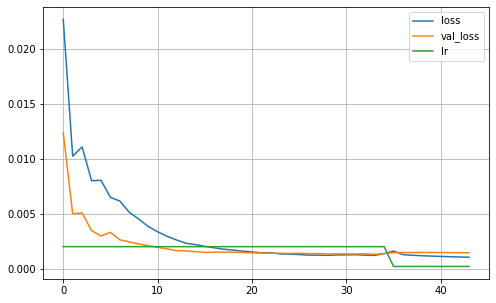

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
# PREVENDO test_size DIAS

preds = []

base_teste = np.copy(X_test)

for i in range(len(base_teste)):
    
    y_pred = model.predict(np.array([base_teste[i]]))[0][0]

    preds.append(y_pred)

    for k in range(len(preds)):
        
        if k < time_steps:
            if(i<len(base_teste)-1):
                base_teste[i+1][0][(time_steps-1)-k] = preds[(len(preds)-1)-k]

# preds

In [15]:
base_teste[0].shape

(1, 182)

In [16]:
# APLICANDO O INVERSE SCALING NOS DADOS

dados_pred = {'validations_per_hour': preds,'d_semana': [0] * test_size,'d_mes': [0] * test_size,'d_ano': [0] * test_size,'hour_sin': [0] * test_size,'hour_cos': [0] * test_size,'hora': [0] * test_size,'mes': [0] * test_size,'semana_do_mes': [0] * test_size,'domingo': [0] * test_size,'segunda': [0] * test_size,'terca': [0] * test_size,'quarta': [0] * test_size,'quinta': [0] * test_size,'sexta': [0] * test_size,'sabado': [0] * test_size}

df_dados_model = df_dados_model.append(pd.DataFrame(data=dados_pred))

if(transformar_features):
    df_dados_model[feature_names] = scaler.inverse_transform(df_dados_model[feature_names])


df_dados_real_predito = df_dados_model.tail(test_size*2)

dados_real = df_dados_real_predito [0:test_size]['validations_per_hour'].to_numpy()

dados_predito = df_dados_real_predito [test_size:test_size*2]['validations_per_hour'].to_numpy()


dados_predito

array([  58.69701747,  481.10257137,  913.93118942,  981.97096181,
        624.42446399,  460.12331074,  427.09621221,  452.00975055,
        525.05442178,  515.97862577,  535.74306053,  666.81349242,
        944.34650505, 1154.02904034,  899.05425012,  511.9467507 ,
        228.72405636,  161.9768801 ,  256.65280953,  152.2838735 ,
         40.60864408,   63.98183448,  522.30243748,  942.41588092,
        944.48337734,  622.63425195,  467.87998319,  442.05768532,
        477.25569302,  562.07795525,  530.53512883,  560.76119155,
        728.42962229,  950.69109201, 1073.2766639 ,  837.65092969,
        490.13513124,  258.85724145,  198.45728594,  283.28713346,
        154.88237162,   30.75004644,   32.08769339,  325.06124794,
        694.71259975,  818.0068903 ,  583.44157922,  490.35232329,
        462.35995907,  496.15574217,  565.30692768,  530.86197042,
        518.38783938,  592.1555149 ,  701.59127522,  668.58469909,
        545.4586755 ,  461.04644018,  321.89200965,  256.10957

In [17]:
df_real_predito = pd.DataFrame({'real':dados_real,'predito':dados_predito})

df_real_predito

,real,predito
0,39.0,58.697017
1,290.0,481.102571
2,627.0,913.931189
3,613.0,981.970962
4,431.0,624.424464
...,...,...
163,138.0,225.695483
164,83.0,164.566434
165,54.0,263.368591
166,30.0,143.272763


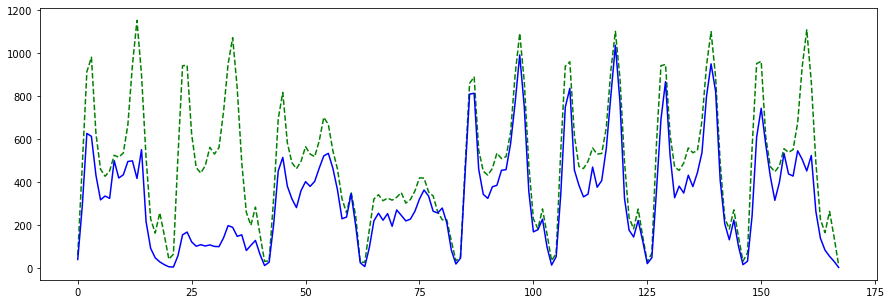

In [18]:
plt.figure(figsize=(15,5))
# plt.plot(range(len(y_train)),y_train, 'g--')
plt.plot(range(len(df_real_predito['predito'])),df_real_predito['predito'], 'g--')
plt.plot(range(len(df_real_predito['real'])),df_real_predito['real'], 'b')
# plt.xlim(0,200)
# plt.ylim(40,200)
plt.show()

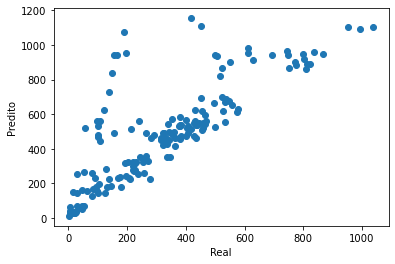

r2= -0.010385710494196454
rmse= 231.37385649459256
mae= 159.0052964580467


In [19]:
plt.scatter(df_real_predito['real'],df_real_predito['predito'])

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()
print('r2=',r2_score(df_real_predito['real'].array,df_real_predito['predito'].array))
print('rmse=',sqrt(mean_squared_error(df_real_predito['real'].array,df_real_predito['predito'].array)))
print('mae=',mean_absolute_error(df_real_predito['real'].array,df_real_predito['predito'].array))